In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

2025-06-02 14:04:31.851152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748873071.880173    1671 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748873071.890751    1671 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748873071.919145    1671 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748873071.919183    1671 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748873071.919186    1671 computation_placer.cc:177] computation placer alr

In [2]:
## Generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'training_set',
    labels  = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test_set',
    labels  = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 8005 files belonging to 2 classes.


I0000 00:00:1748873076.777713    1671 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 2023 files belonging to 2 classes.


In [3]:
## Normalize
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
## Create CNN Model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/home/zahir/Tf_gpu/tfgpu1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


I0000 00:00:1748873082.789057    1755 service.cc:152] XLA service 0x7a6828003e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748873082.789096    1755 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-06-02 14:04:42.938827: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748873083.714277    1755 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1748873096.860402    1755 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.5467 - loss: 3.6384

2025-06-02 14:05:50.240710: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_121', 12 bytes spill stores, 12 bytes spill loads

2025-06-02 14:05:50.390432: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_121', 4 bytes spill stores, 4 bytes spill loads



251/251 ━━━━━━━━━━━━━━━━━━━━ 78s 242ms/step - accuracy: 0.5467 - loss: 3.6336 - val_accuracy: 0.5205 - val_loss: 2.5547
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 46s 185ms/step - accuracy: 0.5601 - loss: 0.8244 - val_accuracy: 0.5783 - val_loss: 0.7618
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 153ms/step - accuracy: 0.5957 - loss: 0.6550 - val_accuracy: 0.5818 - val_loss: 0.9354
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.6098 - loss: 0.6905 - val_accuracy: 0.6446 - val_loss: 0.6527
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.6376 - loss: 0.6195 - val_accuracy: 0.6817 - val_loss: 0.6069
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.6655 - loss: 0.5945 - val_accuracy: 0.6653 - val_loss: 0.7826
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.7092 - loss: 0.5402 - val_accuracy: 0.7182 - val_loss: 0.5768
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.7374 - loss: 0.4965 - val

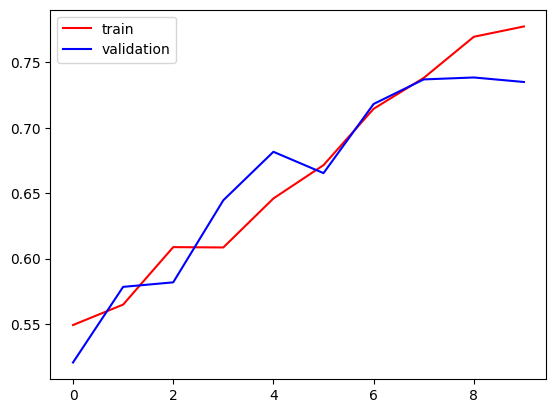

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

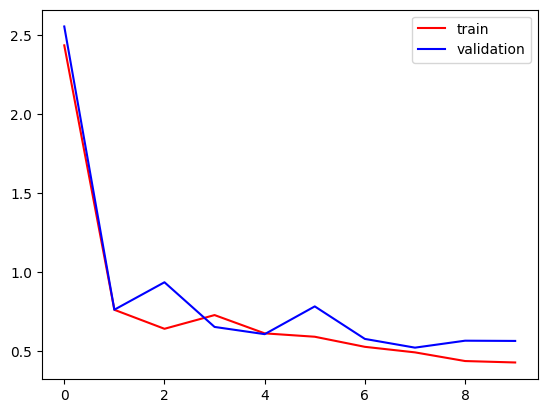

In [9]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Ways to reduce overfitting :

1) Add more Data
2) Data Augmentation
3) L1/L2 Regularizer
4) Dropout
5) Batch Normalization
6) Reduce Complexity

In [10]:
import cv2

In [41]:
test_img = cv2.imread('Dog2.jpg')

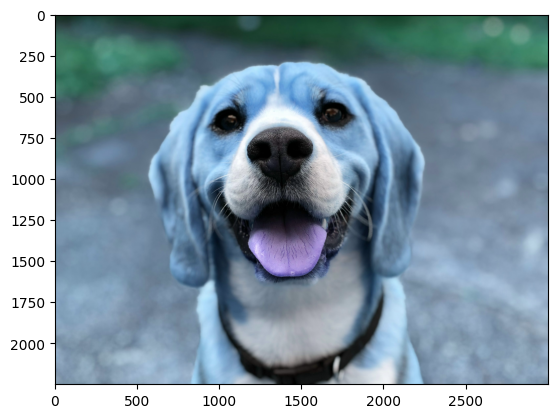

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(2250, 3000, 3)

In [44]:
test_img = cv2.resize(test_img,(256,256))

In [45]:
test_img.shape

(256, 256, 3)

In [46]:
test_input = test_img.reshape((1,256,256,3))

In [47]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[1.]], dtype=float32)